<a href="https://colab.research.google.com/github/KAllYANI2003/RoadAccident_detection_and_Prevention/blob/main/kallyani03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = r'/content/drive/MyDrive/Road accident/final_accident_ff.csv'
df = pd.read_csv(data_path, encoding='latin1', nrows=2409)

In [ ]:
print(df.head())

      ï»¿DISTRICT NAME    UNIT NAME   YEAR  VEHICLE_INVOLVED  \
0       Gomati Tripura      Amarpur   2016                 2   
1       Khowai Tripura       Khowai   2023                 2   
2  Shipahijala Tripura     Charilam   2024                 2   
3      Unakoti Tripura  Kailashahar   2024                 1   
4      Unakoti Tripura  Kailashahar   2024                 1   

  ACCIDENT CLASIFICATION              ACCIDENT SPOT ACCIDENT LOCATION  \
0          Road Accident                  Adhi para              Town   
1          Road Accident              Barmura hills             Hills   
2          Road Accident  Charilam Cooperative Bank              Town   
3          Road Accident               Howrer Bazar           Village   
4          Road Accident                  Manuvelly           Village   

    MAIN CAUSE HIT-RUN         SEVERITY  ... SURFACE CONDITION  \
0  Human Error      no  grievous injury  ...               Dry   
1  Human Error      No  grievous injury  ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ï»¿DISTRICT NAME        2399 non-null   object
 1   UNIT NAME               2398 non-null   object
 2    YEAR                   2399 non-null   int64 
 3   VEHICLE_INVOLVED        2399 non-null   int64 
 4   ACCIDENT CLASIFICATION  2399 non-null   object
 5   ACCIDENT SPOT           2399 non-null   object
 6   ACCIDENT LOCATION       2399 non-null   object
 7   MAIN CAUSE              2399 non-null   object
 8   HIT-RUN                 2399 non-null   object
 9   SEVERITY                2399 non-null   object
 10  COLLISION TYPE          2399 non-null   object
 11  JUNCTION CONTROL        1957 non-null   object
 12  ROAD CHARACTER          2398 non-null   object
 13  ROAD-TYPE               2399 non-null   object
 14  SURFACE-TYPE            2399 non-null   object
 15  SURF

In [ ]:
df = df.dropna()

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
features = ['ACCIDENT SPOT', 'WEATHER', 'ROAD C0NDITION']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

In [ ]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(df)

In [ ]:
scaled_df = pd.DataFrame(features, columns=df.columns)

In [ ]:
print(scaled_df.head(2))

       YEAR  VEHICLE_INVOLVED  \
0 -0.052582          -0.26953   
1  0.982449          -0.26953   

   ï»¿DISTRICT NAME_ Kamrup Metropoliton District Assam  \
0                                          -0.022858      
1                                          -0.022858      

   ï»¿DISTRICT NAME_ South Tripura  ï»¿DISTRICT NAME_ imphal East Manipur  \
0                        -0.022858                              -0.022858   
1                        -0.022858                              -0.022858   

   ï»¿DISTRICT NAME_Aizal District Mizoram  \
0                                -0.022858   
1                                -0.022858   

   ï»¿DISTRICT NAME_Aizawal District Mizoram  ï»¿DISTRICT NAME_Aizawl  \
0                                  -0.056063                -0.112657   
1                                  -0.056063                -0.112657   

   ï»¿DISTRICT NAME_Aizawl District Mizoram  \
0                                 -0.056063   
1                                 -0.

In [ ]:
X = scaled_df.values

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

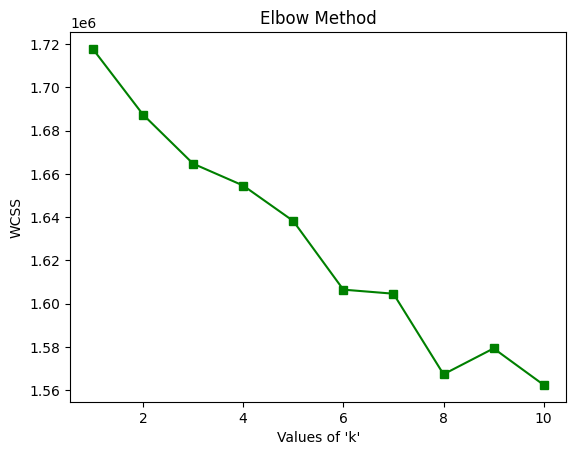

In [ ]:
plt.plot(range(1, 11), wcss, 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
optimal_clusters = 8

In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [ ]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(data=pca.fit_transform(X), columns=['PCA1', 'PCA2'])

In [ ]:
print(reduced_X.head())

        PCA1      PCA2
0  25.327426  1.708413
1  21.453399  1.515200
2  21.901118  1.367222
3  25.490401  1.396978
4  29.565193  2.180635


In [ ]:
centers_pca = pca.transform(centers)

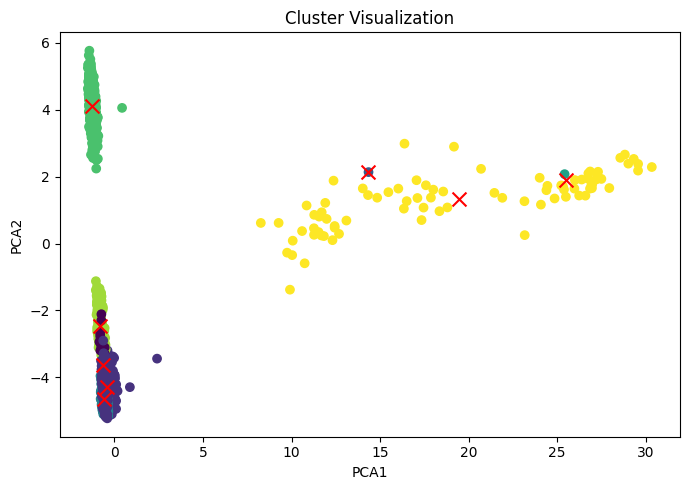

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], c=labels)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster Visualization')
plt.tight_layout()
plt.show()

In [ ]:
pca_components = pca.components_

In [ ]:
component_df = pd.DataFrame(pca_components, index=['PCA1', 'PCA2'], columns=df.columns)

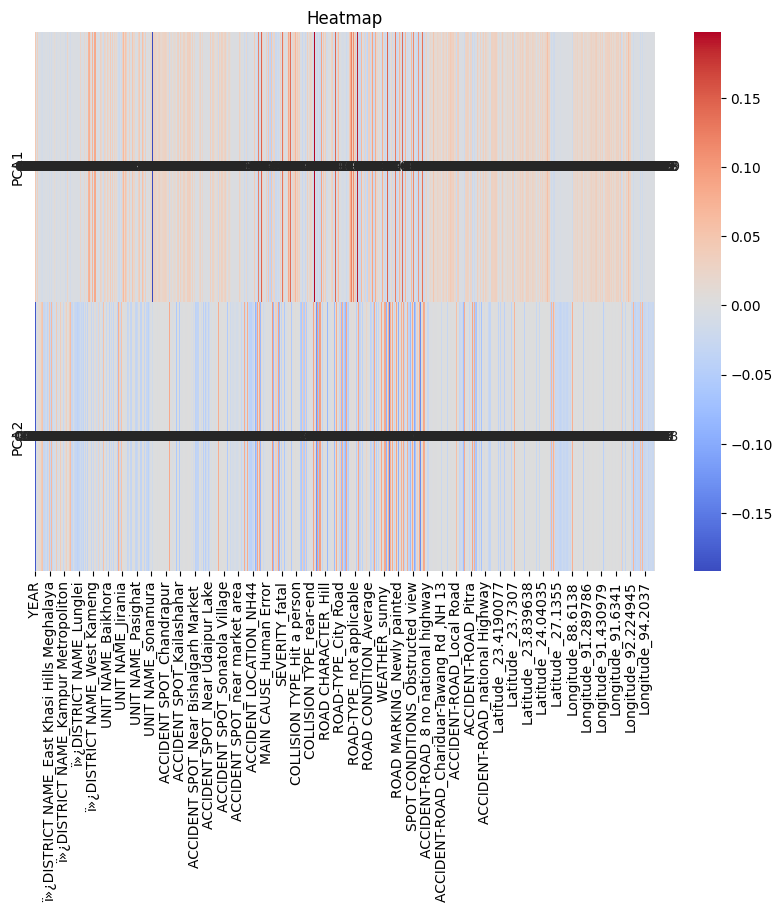

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(component_df, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(7,5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>